<a href="https://colab.research.google.com/github/Sweksha45/OIBSIP/blob/main/stocks_prediction_tataglobal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***STOCKS PREDICTION TATAGLOBAL USING LSTM***

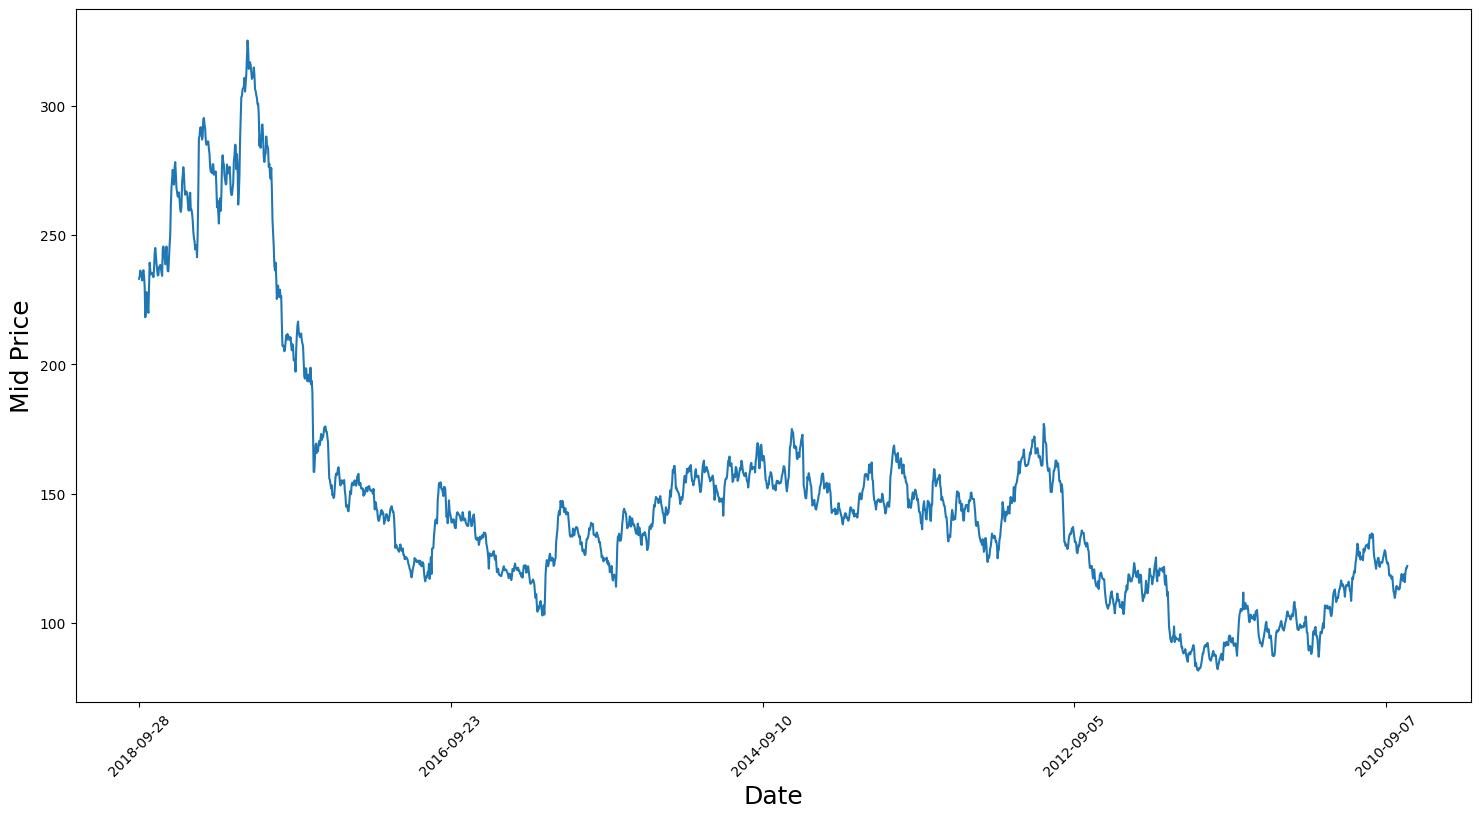

MSE error for standard averaging: 168.55495


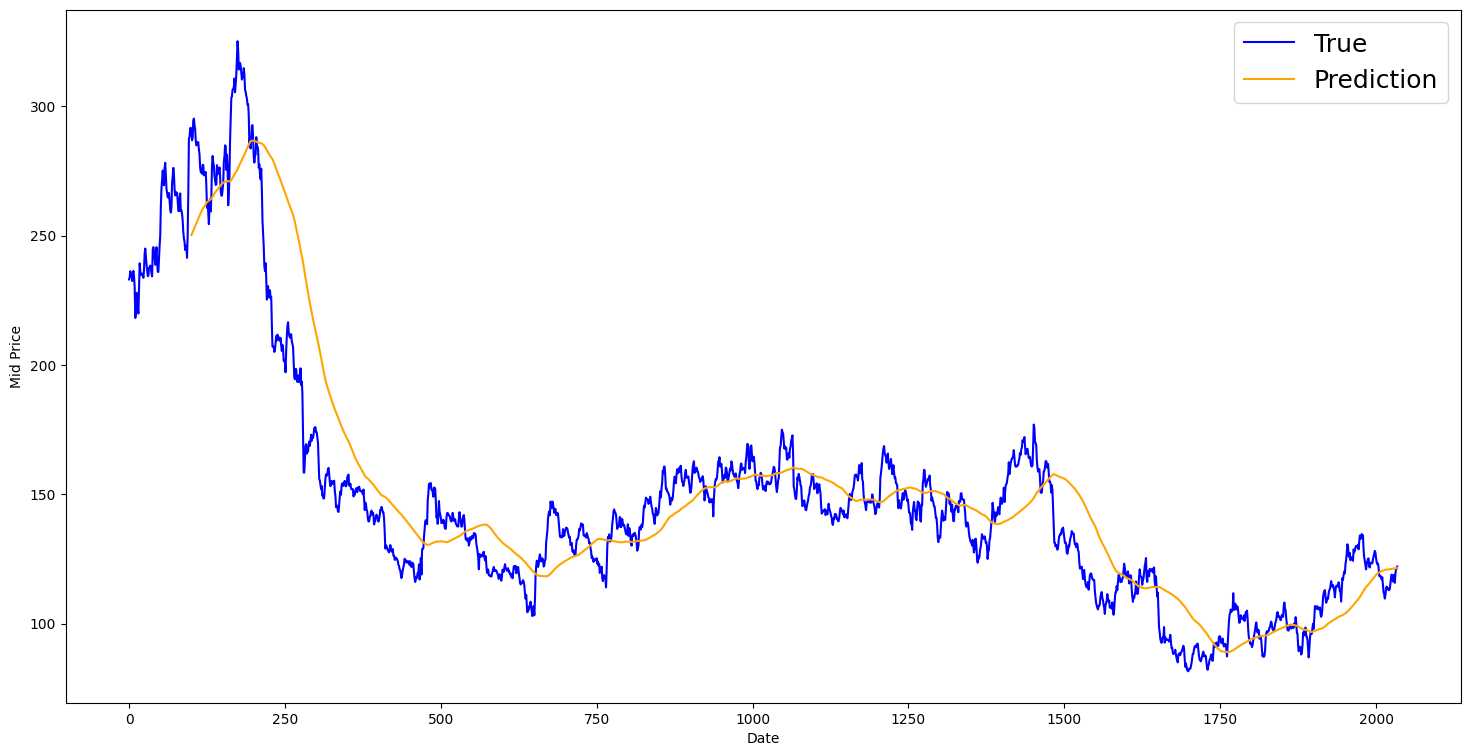

MSE error for EMA averaging: 10.58112


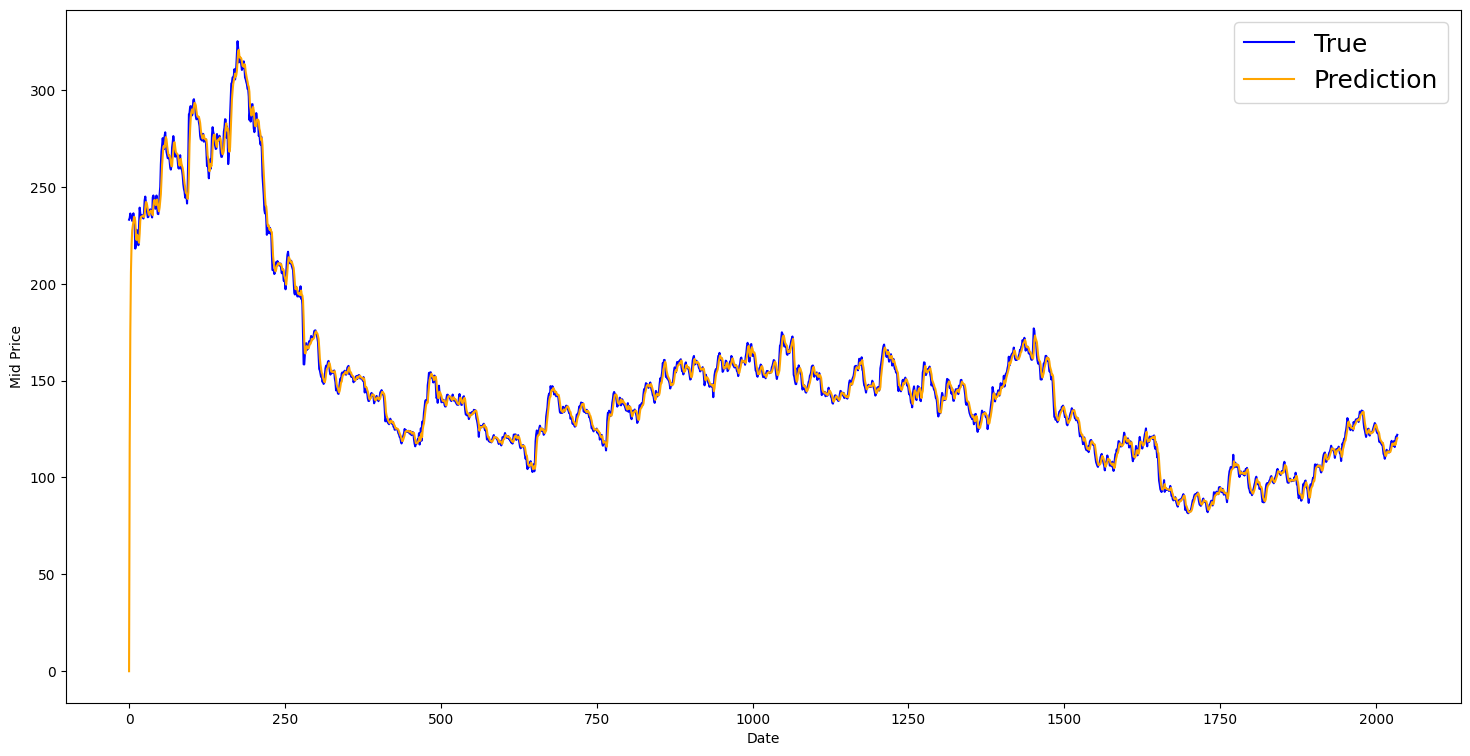

Instructions for updating:
non-resource variables are not supported in the long term
<ipython-input-2-f50e8362b3a7>:148: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  tf1.nn.rnn_cell.LSTMCell(num_units=num_nodes[li],




Unrolled index 0
	Inputs:  [233.075 144.125 134.425 162.2   117.825]

	Output: [234.375 142.975 133.1   162.2   117.825]


Unrolled index 1
	Inputs:  [233.95 142.95 133.1  159.8  114.95]

	Output: [236.25  140.5   131.5   160.575 122.075]


Unrolled index 2
	Inputs:  [236.25  142.975 131.5   161.35  116.65 ]

	Output: [235.325 130.25  130.075 162.175 119.7  ]


Unrolled index 3
	Inputs:  [234.375 140.5   128.15  162.175 117.525]

	Output: [232.475 129.95  128.15  163.625 122.075]


Unrolled index 4
	Inputs:  [234.975 135.6   129.    163.625 119.7  ]

	Output: [234.125 130.25  135.675 157.775 118.   ]


Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Defining training Loss
Learning rate decay operations
TF Optimization operations
	All done
Defining prediction related TF functions
	All done
Initialized
Average loss at step 1: 648248.859375


<ipython-input-2-f50e8362b3a7>:331: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  our_predictions.append(np.asscalar(pred))


	Test MSE: 7432.38574
	Finished Predictions
Average loss at step 2: 474020.703125
	Test MSE: 7424.67480
	Finished Predictions
Average loss at step 3: 438991.539062
	Test MSE: 7413.88818
	Finished Predictions
Average loss at step 4: 456553.718750
	Test MSE: 7397.11426
	Finished Predictions
Average loss at step 5: 467191.609375
	Test MSE: 7368.40771
	Finished Predictions
Average loss at step 6: 451244.960938
	Test MSE: 7313.96729
	Finished Predictions
Average loss at step 7: 429268.296875
	Test MSE: 7208.03760
	Finished Predictions
Average loss at step 8: 437718.765625
	Test MSE: 7057.90479
	Finished Predictions
Average loss at step 9: 482850.523438
	Test MSE: 6920.10400
	Finished Predictions
Average loss at step 10: 558723.046875
	Test MSE: 6807.93604
	Finished Predictions
Average loss at step 11: 516600.007812
	Test MSE: 6713.50879
	Finished Predictions
Average loss at step 12: 431143.898438
	Test MSE: 6630.22412
	Finished Predictions
Average loss at step 13: 423775.921875
	Test MSE: 6

ValueError: ignored

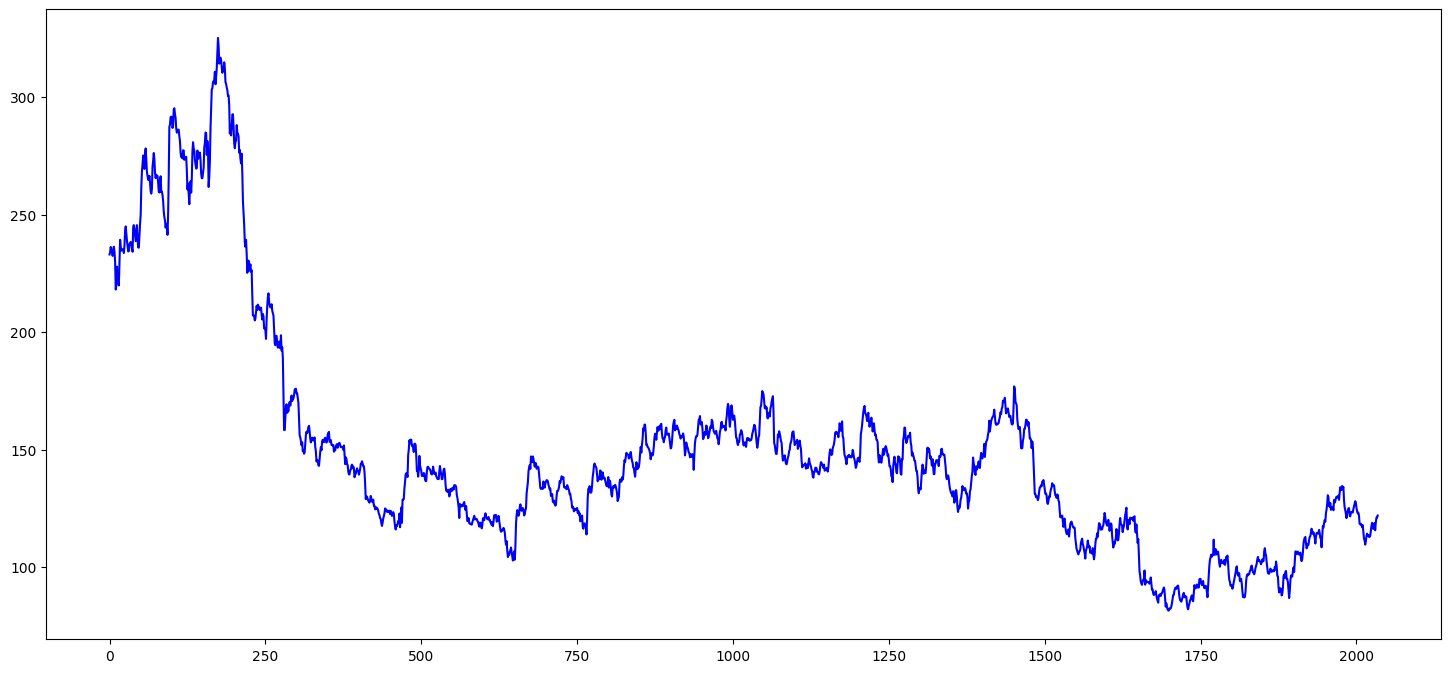

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv("/content/tataglobal.csv")
df.head()
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()
high_prices = np.array(df.loc[:,'High'])
low_prices = np.array(df.loc[:,'Low'])
mid_prices = (high_prices+low_prices)/2.0
train_data = mid_prices[:11000]
test_data = mid_prices[11000:]
all_mid_data = np.concatenate([train_data,test_data],axis=0)
window_size = 100
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = df.loc[pred_idx,'Date']

    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()
window_size = 100
N = train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()
class DataGeneratorSeq(object):

    def __init__(self,prices,batch_size,num_unroll):
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next_batch(self):

        batch_data = np.zeros((self._batch_size),dtype=np.float32)
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)

        for b in range(self._batch_size):
            if self._cursor[b]+1>=self._prices_length:
                #self._cursor[b] = b * self._segments
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)

            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(0,5)]

            self._cursor[b] = (self._cursor[b]+1)%self._prices_length

        return batch_data,batch_labels

    def unroll_batches(self):

        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):

            data, labels = self.next_batch()

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels

    def reset_indices(self):
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))



dg = DataGeneratorSeq(train_data,5,5)
u_data, u_labels = dg.unroll_batches()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat )
    print('\n\tOutput:',lbl)
import tensorflow.compat.v1 as tf1
tf1.disable_v2_behavior()
D = 1
num_unrollings = 50
batch_size = 500
num_nodes = [200,200,150]
n_layers = len(num_nodes)
dropout = 0.2

tf1.reset_default_graph()
train_inputs, train_outputs = [],[]
for ui in range(num_unrollings):
    train_inputs.append(tf1.placeholder(tf1.float32, shape=[batch_size,D],name='train_inputs_%d'%ui))
    train_outputs.append(tf1.placeholder(tf1.float32, shape=[batch_size,1], name = 'train_outputs_%d'%ui))
lstm_cells = [
    tf1.nn.rnn_cell.LSTMCell(num_units=num_nodes[li],
                            state_is_tuple=True,
                            initializer= tf.keras.initializers.GlorotNormal()
                           )
 for li in range(n_layers)]

drop_lstm_cells = [tf1.nn.rnn_cell.DropoutWrapper(
    lstm, input_keep_prob=1.0,output_keep_prob=1.0-dropout, state_keep_prob=1.0-dropout
) for lstm in lstm_cells]
drop_multi_cell = tf1.nn.rnn_cell.MultiRNNCell(drop_lstm_cells)
multi_cell = tf1.nn.rnn_cell.MultiRNNCell(lstm_cells)

w = tf1.get_variable('w',shape=[num_nodes[-1], 1], initializer=tf.keras.initializers.GlorotNormal())
b = tf1.get_variable('b',initializer=tf.random.uniform([1],-0.1,0.1))
from collections.abc import Mapping
c, h = [],[]
initial_state = []
for li in range(n_layers):
  c.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  h.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  initial_state.append(tf1.nn.rnn_cell.LSTMStateTuple(c[li], h[li]))


all_inputs = tf.concat([tf.expand_dims(t,0) for t in train_inputs],axis=0)

all_lstm_outputs, state = tf1.nn.dynamic_rnn(
    cell=drop_multi_cell,
    inputs=all_inputs,
    initial_state=tuple(initial_state),
    time_major=True,
    dtype=tf.float32
)
all_lstm_outputs = tf.reshape(all_lstm_outputs, [batch_size*num_unrollings,num_nodes[-1]])

all_outputs = tf1.nn.xw_plus_b(all_lstm_outputs,w,b)

split_outputs = tf.split(all_outputs,num_unrollings,axis=0)
print('Defining training Loss')
loss = 0.0
with tf.control_dependencies([tf1.assign(c[li], state[li][0]) for li in range(n_layers)]+
                             [tf1.assign(h[li], state[li][1]) for li in range(n_layers)]):
  for ui in range(num_unrollings):
    loss += tf.reduce_mean(0.5*(split_outputs[ui]-train_outputs[ui])**2)

print('Learning rate decay operations')
global_step = tf.Variable(0, trainable=False)
inc_gstep = tf1.assign(global_step,global_step + 1)
tf_learning_rate = tf1.placeholder(shape=None,dtype=tf.float32)
tf_min_learning_rate = tf1.placeholder(shape=None,dtype=tf.float32)

learning_rate = tf.maximum(
    tf1.train.exponential_decay(tf_learning_rate, global_step, decay_steps=1, decay_rate=0.5, staircase=True),
    tf_min_learning_rate)
# Optimizer.
print('TF Optimization operations')
optimizer = tf1.train.AdamOptimizer(learning_rate)
gradients, v = zip(*optimizer.compute_gradients(loss))
gradients, _ = tf.clip_by_global_norm(gradients, 5.0)
optimizer = optimizer.apply_gradients(
    zip(gradients, v))

print('\tAll done')
print('Defining prediction related TF functions')

sample_inputs = tf1.placeholder(tf.float32, shape=[1,D])

# Maintaining LSTM state for prediction stage
sample_c, sample_h, initial_sample_state = [],[],[]
for li in range(n_layers):
  sample_c.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  sample_h.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  initial_sample_state.append(tf1.nn.rnn_cell.LSTMStateTuple(sample_c[li],sample_h[li]))

reset_sample_states = tf.group(*[tf1.assign(sample_c[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)],
                               *[tf1.assign(sample_h[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)])

sample_outputs, sample_state = tf1.nn.dynamic_rnn(multi_cell, tf.expand_dims(sample_inputs,0),
                                   initial_state=tuple(initial_sample_state),
                                   time_major = True,
                                   dtype=tf.float32)
with tf.control_dependencies([tf1.assign(sample_c[li],sample_state[li][0]) for li in range(n_layers)]+
                              [tf1.assign(sample_h[li],sample_state[li][1]) for li in range(n_layers)]):
  sample_prediction = tf1.nn.xw_plus_b(tf.reshape(sample_outputs,[1,-1]), w, b)

print('\tAll done')
epochs = 30
valid_summary = 1 # Interval you make test predictions

n_predict_once = 50 # Number of steps you continously predict for

train_seq_length = train_data.size # Full length of the training data

train_mse_ot = [] # Accumulate Train losses
test_mse_ot = [] # Accumulate Test loss
predictions_over_time = [] # Accumulate predictions

session = tf1.Session()

tf1.global_variables_initializer().run(session=session)

# Used for decaying learning rate
loss_nondecrease_count = 0
loss_nondecrease_threshold = 2 # If the test error hasn't increased in this many steps, decrease learning rate

print('Initialized')
average_loss = 0

# Define data generator
data_gen = DataGeneratorSeq(train_data,batch_size,num_unrollings)

x_axis_seq = []

# Points you start your test predictions from
test_points_seq = np.arange(11000,12000,50).tolist()

for ep in range(epochs):

    # ========================= Training =====================================
    for step in range(train_seq_length//batch_size):

        u_data, u_labels = data_gen.unroll_batches()

        feed_dict = {}
        for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):
            feed_dict[train_inputs[ui]] = dat.reshape(-1,1)
            feed_dict[train_outputs[ui]] = lbl.reshape(-1,1)

        feed_dict.update({tf_learning_rate: 0.0001, tf_min_learning_rate:0.000001})

        _, l = session.run([optimizer, loss], feed_dict=feed_dict)

        average_loss += l

    # ============================ Validation ==============================
    if (ep+1) % valid_summary == 0:

      average_loss = average_loss/(valid_summary*(train_seq_length//batch_size))

      # The average loss
      if (ep+1)%valid_summary==0:
        print('Average loss at step %d: %f' % (ep+1, average_loss))

      train_mse_ot.append(average_loss)

      average_loss = 0 # reset loss

      predictions_seq = []

      mse_test_loss_seq = []

      # ===================== Updating State and Making Predicitons ========================
      for w_i in test_points_seq:
        mse_test_loss = 0.0
        our_predictions = []

        if (ep+1)-valid_summary==0:
          # Only calculate x_axis values in the first validation epoch
          x_axis=[]

        # Feed in the recent past behavior of stock prices
        # to make predictions from that point onwards
        for tr_i in range(max(w_i - num_unrollings + 1, 0), min(w_i - 1, train_seq_length)):
          current_price = all_mid_data[tr_i]
          feed_dict[sample_inputs] = np.array(current_price).reshape(1, 1)
          _ = session.run(sample_prediction, feed_dict=feed_dict)


        feed_dict = {}

        if w_i - 1 < train_seq_length:
          current_price = all_mid_data[w_i - 1]
        else:
          current_price = all_mid_data[train_seq_length - 1]


        feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)

        # Make predictions for this many steps
        # Each prediction uses previous prediciton as it's current input
        for pred_i in range(n_predict_once):

          pred = session.run(sample_prediction,feed_dict=feed_dict)

          our_predictions.append(np.asscalar(pred))

          feed_dict[sample_inputs] = np.asarray(pred).reshape(-1,1)

          if (ep+1)-valid_summary==0:
            # Only calculate x_axis values in the first validation epoch
            x_axis.append(w_i+pred_i)

          if w_i + pred_i < train_seq_length:
            x_axis.append(w_i + pred_i)
            mse_test_loss += 0.5 * (pred - all_mid_data[w_i + pred_i]) ** 2
          else:
            x_axis.append(train_seq_length - 1)
            mse_test_loss += 0.5 * (pred - all_mid_data[train_seq_length - 1]) ** 2

        session.run(reset_sample_states)

        predictions_seq.append(np.array(our_predictions))

        mse_test_loss /= n_predict_once
        mse_test_loss_seq.append(mse_test_loss)

        if (ep+1)-valid_summary==0:
          x_axis_seq.append(x_axis)

      current_test_mse = np.mean(mse_test_loss_seq)

      # Learning rate decay logic
      if len(test_mse_ot)>0 and current_test_mse > min(test_mse_ot):
          loss_nondecrease_count += 1
      else:
          loss_nondecrease_count = 0

      if loss_nondecrease_count > loss_nondecrease_threshold :
            session.run(inc_gstep)
            loss_nondecrease_count = 0
            print('\tDecreasing learning rate by 0.5')

      test_mse_ot.append(current_test_mse)
      print('\tTest MSE: %.5f'%np.mean(mse_test_loss_seq))
      predictions_over_time.append(predictions_seq)
      print('\tFinished Predictions')
      best_prediction_epoch = 28 # replace this with the epoch that you got the best results when running the plotting code

plt.figure(figsize = (18,18))
plt.subplot(2,1,1)
plt.plot(range(df.shape[0]),all_mid_data,color='b')

# Plotting how the predictions change over time
# Plot older predictions with low alpha and newer predictions with high alpha
start_alpha = 0.25
alpha = np.arange(start_alpha, 1.1, (1.0 - start_alpha) / len(predictions_over_time[::3]))

for p_i, p in enumerate(predictions_over_time[::3]):
    for xval, yval in zip(x_axis_seq, p):
        if len(xval) > 0 and len(yval) > 0:  # Check if there are predictions available
            plt.plot(xval, yval, color='r', alpha=alpha[p_i])

plt.title('Evolution of Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(11000,12500)

plt.subplot(2,1,2)

# Predicting the best test prediction you got
plt.plot(range(df.shape[0]),all_mid_data,color='b')
for xval,yval in zip(x_axis_seq,predictions_over_time[best_prediction_epoch]):
    plt.plot(xval,yval,color='r')

plt.title('Best Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(11000,12500)
plt.show()